# Случайный лес ,без сезонной компоненты.

In [ ]:
import pandas as pd
from matplotlib import pyplot
from numpy import asarray
from pandas import DataFrame, concat
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [5]:
# Выгружаем данные
data = pd.read_csv("https://raw.githubusercontent.com/dmitry-chvdr/aqi_prediction/Checkpoint4/ts_air_quality_index_2013_2020.csv")
data = data[["aqi", "Date"]]
ts_wage = data.set_index('Date').sort_index()

# Подготовка данных для модели
series = ts_wage
values = series.values

INFO:pycodestyle:2:80: E501 line too long (130 > 79 characters)


# Random Forest без сезонной компоненты <br>

Особенность данного метода предсказания в построении 1000 деревьев и предсказании следующего дня на одним из них (случайно выбраном).

In [9]:
# изменяем исходный датасет
def series_to_learn(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values


# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]


# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]


# walk_forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
    # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
    # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
    # store forecast in list of predictions
        predictions.append(yhat)
    # add actual observation to history for the next loop
        history.append(test[i])
    # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

INFO:pycodestyle:48:5: E115 expected an indented block (comment)


# Выполним серию экспериментов.<br>
Работаем с:<br>
*n_in; n_out - кол-во сдвигов данных*<br>
*walk_forward_validatin ('data' , 'days_for_predict') - кол-во дней предсказаний*<br>

>expected=48.0, predicted=45.2
>expected=40.0, predicted=46.0
>expected=61.0, predicted=46.3
>expected=50.0, predicted=76.0
>expected=52.0, predicted=46.7
>expected=14.0, predicted=54.3
MAE: 15.856


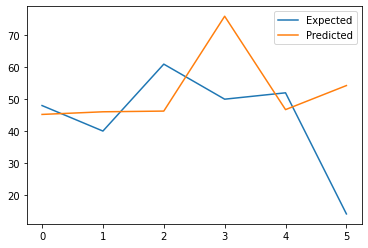

In [10]:
# Сдвиг = 15 , предсказание на 6 дней.

# преобразование временного ряда в новый вид
data = series_to_learn(values, n_in=15, n_out=1)

# оценка предсказаний
mae, y, yhat = walk_forward_validation(data, 6)
print('MAE: %.3f' % mae)

# построение ожидаемого и предсказанного моделью
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

>expected=61.0, predicted=68.5
>expected=61.0, predicted=68.1
>expected=63.0, predicted=68.3
>expected=60.0, predicted=69.4
>expected=51.0, predicted=66.5
>expected=46.0, predicted=86.8
>expected=46.0, predicted=63.0
>expected=43.0, predicted=53.5
>expected=38.0, predicted=67.5
>expected=48.0, predicted=47.4
>expected=40.0, predicted=49.1
>expected=61.0, predicted=59.0
>expected=50.0, predicted=72.6
>expected=52.0, predicted=101.5
>expected=14.0, predicted=56.3
MAE: 17.915


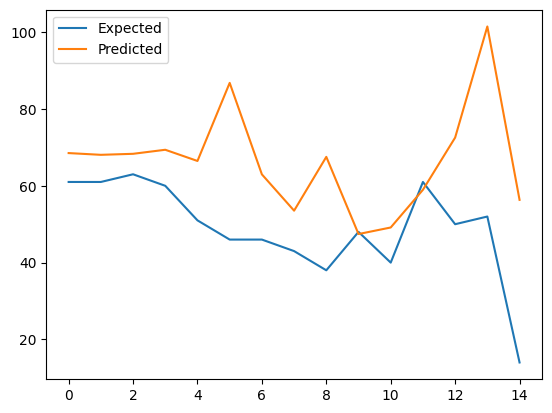

In [ ]:
# Сдвиг 215 , предсказания на 15 дней (долго считается!!!)

# преобразование временного ряда в новый вид
data = series_to_learn(values, n_in=200, n_out=15)

# оценка предсказаний
mae, y, yhat = walk_forward_validation(data, 15)
print('MAE: %.3f' % mae)

# построение ожидаемого и предсказанного моделью
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

>expected=61.0, predicted=67.8
>expected=61.0, predicted=68.5
>expected=63.0, predicted=67.4
>expected=60.0, predicted=67.0
>expected=51.0, predicted=67.0
>expected=46.0, predicted=52.1
>expected=46.0, predicted=50.8
>expected=43.0, predicted=49.2
>expected=38.0, predicted=49.9
>expected=48.0, predicted=46.4
>expected=40.0, predicted=50.8
>expected=61.0, predicted=45.9
>expected=50.0, predicted=78.0
>expected=52.0, predicted=48.5
>expected=14.0, predicted=54.0
MAE: 11.308


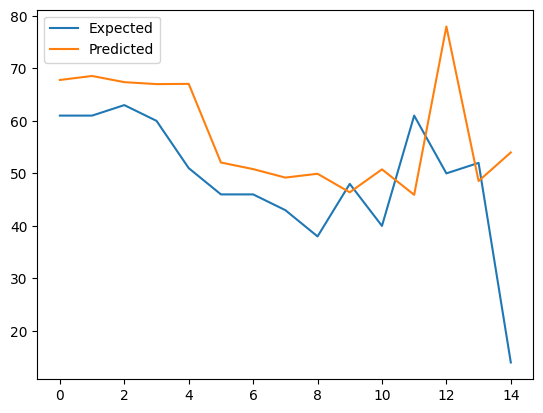

In [ ]:
# Сдвиг 30, предсказания на 15 дней

# преобразование временного ряда в новый вид
data = series_to_learn(values, n_in=15, n_out=15)

#оценка предсказаний
mae, y, yhat = walk_forward_validation(data, 15)
print('MAE: %.3f' % mae)

# построение ожидаемого и предсказанного моделью
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

>expected=62.0, predicted=66.0
>expected=55.0, predicted=67.5
>expected=36.0, predicted=61.0
>expected=38.0, predicted=53.3
>expected=39.0, predicted=46.6
>expected=42.0, predicted=46.7
>expected=52.0, predicted=45.3
>expected=42.0, predicted=51.5
>expected=38.0, predicted=48.6
>expected=52.0, predicted=47.6
>expected=66.0, predicted=63.4
>expected=72.0, predicted=76.5
>expected=71.0, predicted=75.5
>expected=54.0, predicted=72.0
>expected=51.0, predicted=61.9
>expected=46.0, predicted=53.7
>expected=66.0, predicted=53.7
>expected=87.0, predicted=68.7
>expected=117.0, predicted=84.0
>expected=86.0, predicted=88.6
>expected=78.0, predicted=79.7
>expected=75.0, predicted=80.4
>expected=63.0, predicted=83.2
>expected=78.0, predicted=69.9
>expected=104.0, predicted=82.1
>expected=102.0, predicted=90.3
>expected=81.0, predicted=96.6
>expected=93.0, predicted=82.8
>expected=97.0, predicted=90.4
>expected=85.0, predicted=95.4
>expected=64.0, predicted=91.2
>expected=66.0, predicted=75.1
>expe

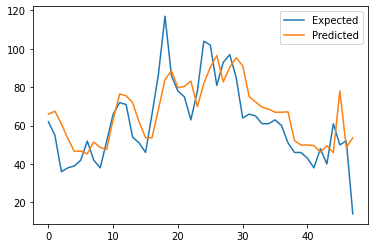

In [ ]:
# Сдвиг 30, предсказания на 48 дней

# преобразование временного ряда в новый вид
data = series_to_learn(values, n_in=15, n_out=15)

#оценка предсказаний
mae, y, yhat = walk_forward_validation(data, 48)
print('MAE: %.3f' % mae)

# построение ожидаемого и предсказанного моделью
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

Наилучшее решение:<br>
Сдвиг 30; предсказание на 15 дней. MAE 11.9